# Model validation currents

Note: this notebook requires the model output data

In [29]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h

In [30]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [31]:
# Load observation data
ulist, vlist = h.get_u_v_point_obs()

In [33]:
# Load MIKE21 simulation data
mr_u = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_v = ms.DfsuModelResult(mr_fn, name="MIKE21", item=2)
mr_u

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: u velocity component [m/s]

In [34]:
# u velocities
cmps = []
for o in ulist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_u))
    except Exception as e:
        print(e)
cc_u = ms.ComparerCollection(cmps)

PointObservation 'DB' (-2.987675905227661, 49.137184143066406) outside model domain!


In [35]:
# v velocities
cmps = []
for o in vlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_v))
    except Exception as e:
        print(e)
cc_v = ms.ComparerCollection(cmps)

PointObservation 'DB' (-2.987675905227661, 49.137184143066406) outside model domain!


## Skill tables

In [36]:
# Print statistics for the u-component
cc_u.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
MO_NN,82544,-0.011,0.104,0.104,0.083,0.966,0.330,0.913
IJmondstroompaal2,98887,0.033,0.106,0.101,0.078,0.794,0.796,0.517


In [37]:
# Print statistics for the v-component
cc_v.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
MO_NN,82544,-0.030,0.083,0.077,0.067,0.491,0.994,0.113
IJmondstroompaal2,98887,-0.029,0.338,0.337,0.295,0.869,0.740,0.572


## Scatter plots

c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(
c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(
c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(
c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(


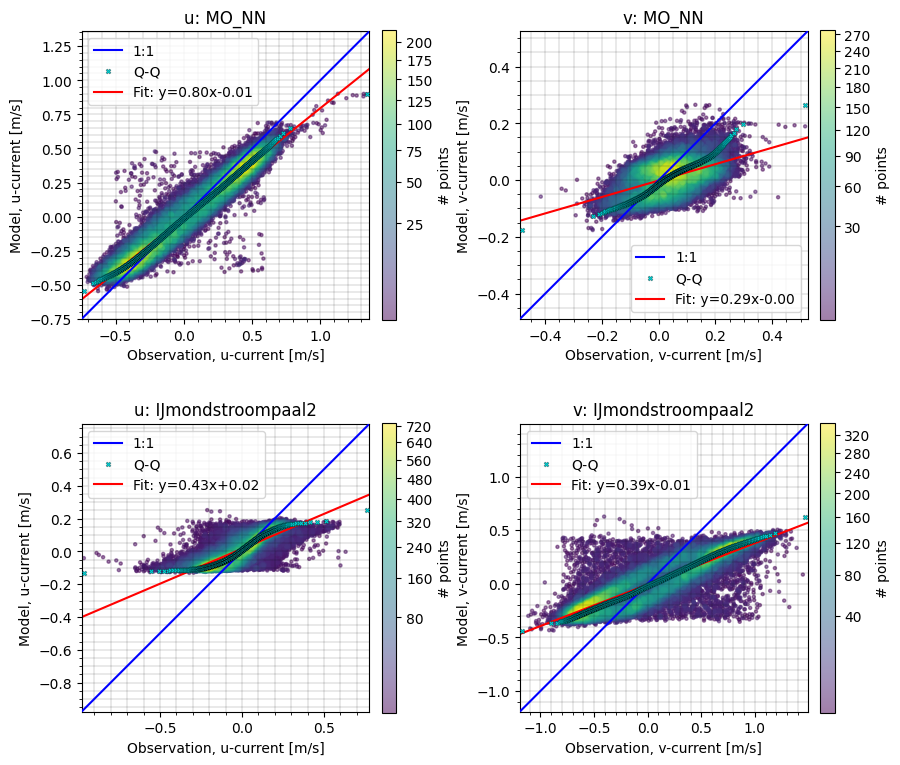

In [38]:
fig, axs = plt.subplots(len(cc_u), 2, figsize=(9,4*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel().plot.scatter(ax=axs[i*2], title=f"u: {cc_u[i].name}")
    cc_v[i].sel().plot.scatter(ax=axs[i*2+1], title=f"v: {cc_v[i].name}")
plt.tight_layout()
plt.show()

In [58]:
cc_u[1].x

4.518046855926514

In [49]:
cc_u[1].y

52.46505737304688

In [51]:
## Check for full model in IJmondstroompaal2
u_full = ms.PointModelResult("../output/IJmondstroompaal2_full_model_u_v.dfs0", name="MIKE21full",item="u",x=cc_u[1].x,y=cc_u[1].y)
v_full = ms.PointModelResult("../output/IJmondstroompaal2_full_model_u_v.dfs0", name="MIKE21full",item="v",x=cc_u[1].x,y=cc_u[1].y)

In [55]:
cmp_u_full = ms.match(obs=ulist[1], mod=u_full)
cmp_v_full = ms.match(obs=vlist[1], mod=v_full)

c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(
c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(


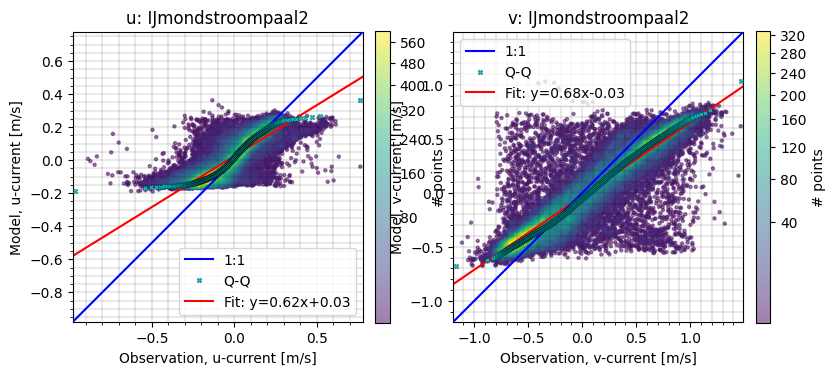

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))
axs = axs.flatten()
cmp_u_full.sel().plot.scatter(ax=axs[0], title=f"u: {cmp_u_full.name}")
cmp_v_full.sel().plot.scatter(ax=axs[1], title=f"v: {cmp_v_full.name}")
plt.show()

In [39]:
import numpy as np

In [45]:
cc_u[1].x

4.518046855926514

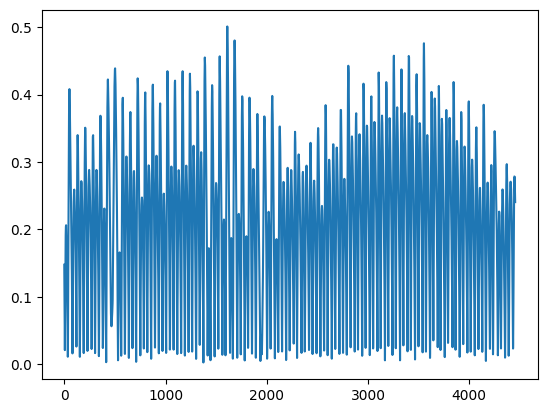

In [42]:
speed = np.sqrt(cc_u[1].sel(time=time_slice).data["MIKE21"].data**2 +cc_v[i].sel(time=time_slice).data["MIKE21"].data**2)

fig, ax = plt.subplots()
plt.plot(speed)


## Timeseries

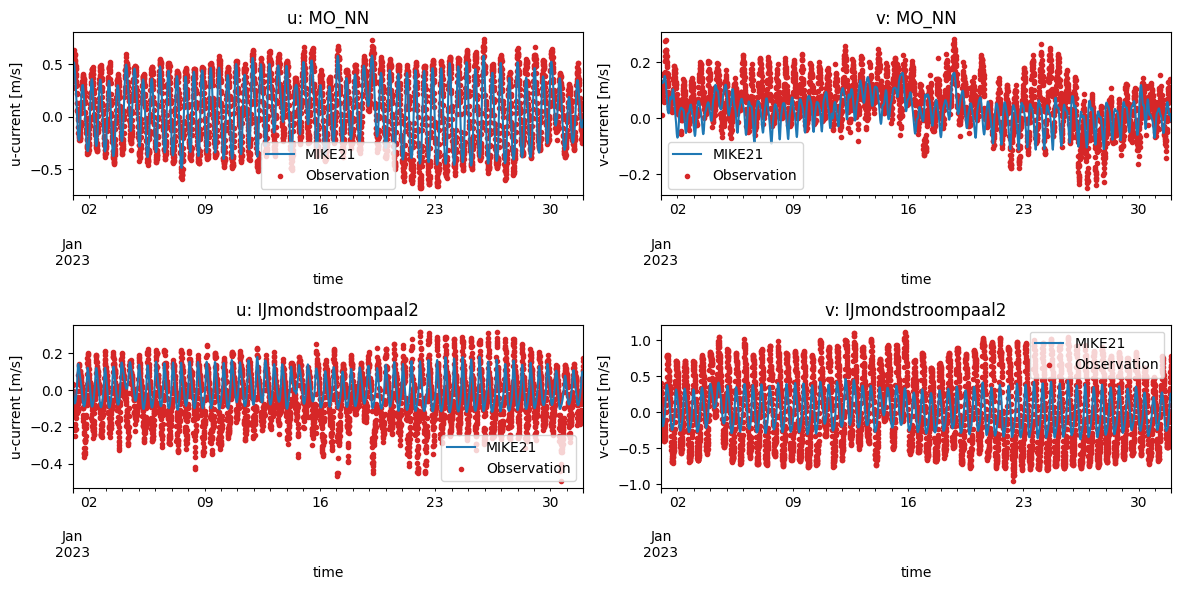

In [13]:
# Look at a timeseries for a qualitative comparison between observations and model
time_slice = slice("2023-01","2023-01")
fig, axs = plt.subplots(len(cc_u), 2, figsize=(12,3*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel(time=time_slice).plot.timeseries(ax=axs[i*2], title=f"u: {cc_u[i].name}")
    cc_v[i].sel(time=time_slice).plot.timeseries(ax=axs[i*2+1], title=f"v: {cc_v[i].name}")
plt.tight_layout()
plt.show()

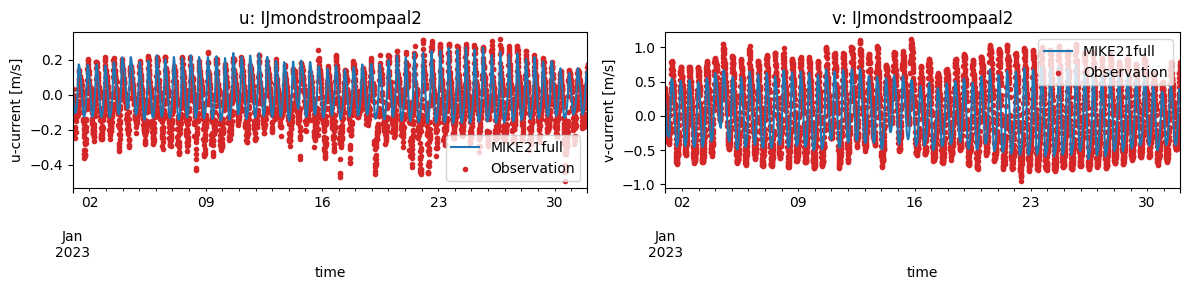

In [57]:
# Look at a timeseries for a qualitative comparison between observations and model
time_slice = slice("2023-01","2023-01")
fig, axs = plt.subplots(1, 2, figsize=(12,3))
axs = axs.flatten()
cmp_u_full.sel(time=time_slice).plot.timeseries(ax=axs[0], title=f"u: {cmp_u_full.name}")
cmp_v_full.sel(time=time_slice).plot.timeseries(ax=axs[1], title=f"v: {cmp_v_full.name}")
plt.tight_layout()
plt.show()